In [14]:
#importing all the necessary libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import json
import urllib.request

### Part 1
Q1

In [15]:
#extracting the information needed in form of a json file from the websites api
url = 'https://covidtrackerapi.bsg.ox.ac.uk/api/v2/stringency/date-range/2020-01-22/2020-05-10'
data = urllib.request.urlopen(url).read()
json_data = json.loads(data)

In [16]:
json_data

{'scale': {'deaths': {'min': 0, 'max': 83505},
  'casesConfirmed': {'min': 0, 'max': 1337061},
  'stringency': {'min': 0, 'max': 100}},
 'countries': ['ABW',
  'AFG',
  'AGO',
  'ALB',
  'AND',
  'ARE',
  'ARG',
  'AUS',
  'AUT',
  'AZE',
  'BDI',
  'BEL',
  'BEN',
  'BFA',
  'BGD',
  'BGR',
  'BHR',
  'BHS',
  'BIH',
  'BLR',
  'BLZ',
  'BMU',
  'BOL',
  'BRA',
  'BRB',
  'BRN',
  'BTN',
  'BWA',
  'CAF',
  'CAN',
  'CHE',
  'CHL',
  'CHN',
  'CIV',
  'CMR',
  'COD',
  'COG',
  'COL',
  'CPV',
  'CRI',
  'CUB',
  'CYP',
  'CZE',
  'DEU',
  'DJI',
  'DMA',
  'DNK',
  'DOM',
  'DZA',
  'ECU',
  'EGY',
  'ERI',
  'ESP',
  'EST',
  'ETH',
  'FIN',
  'FJI',
  'FRA',
  'FRO',
  'GAB',
  'GBR',
  'GEO',
  'GHA',
  'GIN',
  'GMB',
  'GRC',
  'GRL',
  'GTM',
  'GUM',
  'GUY',
  'HKG',
  'HND',
  'HRV',
  'HTI',
  'HUN',
  'IDN',
  'IND',
  'IRL',
  'IRN',
  'IRQ',
  'ISL',
  'ISR',
  'ITA',
  'JAM',
  'JOR',
  'JPN',
  'KAZ',
  'KEN',
  'KGZ',
  'KHM',
  'KIR',
  'KOR',
  'KWT',
  'LAO',
  'LB

In [17]:
#creating a list of countries present in the data loaded
json_country_list = json_data['countries']

In [18]:
#creatiing 3 empty dataframes which the data that was loaded from the website would be inputted into
country_death=pd.DataFrame(json_country_list, columns=['country']) 
country_confirmed=pd.DataFrame(json_country_list, columns=['country']) 
country_stringency=pd.DataFrame(json_country_list, columns=['country'])

In [19]:
country_death

country
0       ABW
1       AFG
2       AGO
3       ALB
4       AND
..      ...
179     VUT
180     YEM
181     ZAF
182     ZMB
183     ZWE

[184 rows x 1 columns]

In [20]:
country_confirmed

country
0       ABW
1       AFG
2       AGO
3       ALB
4       AND
..      ...
179     VUT
180     YEM
181     ZAF
182     ZMB
183     ZWE

[184 rows x 1 columns]

In [21]:
country_confirmed

country
0       ABW
1       AFG
2       AGO
3       ALB
4       AND
..      ...
179     VUT
180     YEM
181     ZAF
182     ZMB
183     ZWE

[184 rows x 1 columns]

In [22]:
#the code below inputs the data gotten from the website into the empty dataframes created
#for i in json_country_list iterates over all the countries in country_list and sets all the data for each country to 0 to start with.
#for j in json_data["data"].keys() and for k in json_data["data"][j].keys() iterates over all the dates in the json_data dictionary and for each date, it checks if the country is present in the json_data.
for i in json_country_list:
    country_death.loc[country_death['country'] == i, json_data['data'].keys()] = 0
    country_confirmed.loc[country_confirmed['country'] == i, json_data['data'].keys()] = 0
    country_stringency.loc[country_stringency['country'] == i, json_data['data'].keys()] = 0
    
    for j in json_data["data"].keys():
        for k in json_data["data"][j].keys():
            if i == k:
                country_death.loc[country_death['country'] == i, j] = json_data["data"][j][k]['deaths']
                country_confirmed.loc[country_confirmed['country'] == i, j] = json_data["data"][j][k]['confirmed']
                country_stringency.loc[country_stringency['country'] == i, j] = json_data["data"][j][k]['stringency']

In [23]:
#creating an excel file and inputting the dataframes into separate sheets 
with pd.ExcelWriter('My_OxCGRT_summary.xlsx') as writer:
    country_death.to_excel(writer, sheet_name='Deaths', index=False)
    country_confirmed.to_excel(writer, sheet_name='Cases Confirmed', index=False)
    country_stringency.to_excel(writer, sheet_name='Stringency', index=False)

Q2

In [24]:
#getting the dataframes needed from the excel sheet provided
df_confirmed_cases = pd.read_excel('OxCGRT_summary.xlsx', sheet_name=0)
df_confirmed_deaths = pd.read_excel('OxCGRT_summary.xlsx', sheet_name=1)
df_stringency_index = pd.read_excel('OxCGRT_summary.xlsx', sheet_name=2)

In [25]:
df_confirmed_cases

country_name country_code  22Jan2020  23Jan2020  24Jan2020  25Jan2020  \
0           Aruba          ABW        0.0        0.0        0.0        0.0   
1     Afghanistan          AFG        0.0        0.0        0.0        0.0   
2          Angola          AGO        0.0        0.0        0.0        0.0   
3         Albania          ALB        0.0        0.0        0.0        0.0   
4         Andorra          AND        0.0        0.0        0.0        0.0   
..            ...          ...        ...        ...        ...        ...   
182       Vanuatu          VUT        0.0        0.0        0.0        0.0   
183         Yemen          YEM        0.0        0.0        0.0        0.0   
184  South Africa          ZAF        0.0        0.0        0.0        0.0   
185        Zambia          ZMB        0.0        0.0        0.0        0.0   
186      Zimbabwe          ZWE        0.0        0.0        0.0        0.0   

     26Jan2020  27Jan2020  28Jan2020  29Jan2020  ...  01May2020  02May2020  \
0          0.0        0.0        0.0        0.0  ...      100.0      100.0   
1          0.0        0.0        0.0        0.0  ...     2171.0     2469.0   
2          0.0        0.0        0.0        0.0  ...       30.0       35.0   
3          0.0        0.0        0.0        0.0  ...      782.0      789.0   
4          0.0        0.0        0.0        0.0  ...      745.0      747.0   
..         ...        ...        ...        ...  ...        ...        ...   
182        0.0        0.0        0.0        0.0  ...        0.0        0.0   
183        0.0        0.0        0.0        0.0  ...        7.0       10.0   
184        0.0        0.0        0.0        0.0  ...     5951.0     6336.0   
185        0.0        0.0        0.0        0.0  ...      109.0      119.0   
186        0.0        0.0        0.0        0.0  ...       40.0       34.0   

     03May2020  04May2020  05May2020  06May2020  07May2020  08May2020  \
0        100.0      100.0      101.0      101.0      101.0      101.0   
1       2469.0     2469.0     2469.0     3224.0     3392.0     3563.0   
2         35.0       35.0       36.0       36.0       36.0       43.0   
3        795.0      803.0      820.0      832.0      842.0      850.0   
4        748.0      750.0      751.0      751.0      752.0      752.0   
..         ...        ...        ...        ...        ...        ...   
182        0.0        0.0        0.0        0.0        0.0        0.0   
183       10.0       12.0       21.0       25.0       25.0       34.0   
184     6783.0     7220.0     7572.0     7808.0     8232.0     8895.0   
185      124.0      137.0      138.0      146.0      153.0      167.0   
186       34.0       34.0       34.0       34.0       34.0       34.0   

     09May2020  10May2020  
0        101.0      101.0  
1       3563.0     4402.0  
2         43.0       45.0  
3        856.0      868.0  
4        754.0      755.0  
..         ...        ...  
182        0.0        0.0  
183       34.0       51.0  
184     9420.0    10015.0  
185      252.0      267.0  
186       35.0       36.0  

[187 rows x 112 columns]

In [26]:
#the number of values equals to zero in each column
df_confirmed_cases.eq(0).sum()

country_name      0
country_code      0
22Jan2020       179
23Jan2020       175
24Jan2020       174
               ... 
06May2020         5
07May2020         5
08May2020         5
09May2020         5
10May2020         5
Length: 112, dtype: int64

In [27]:
df_confirmed_deaths

country_name country_code  22Jan2020  23Jan2020  24Jan2020  25Jan2020  \
0           Aruba          ABW        0.0        0.0        0.0        0.0   
1     Afghanistan          AFG        0.0        0.0        0.0        0.0   
2          Angola          AGO        0.0        0.0        0.0        0.0   
3         Albania          ALB        0.0        0.0        0.0        0.0   
4         Andorra          AND        0.0        0.0        0.0        0.0   
..            ...          ...        ...        ...        ...        ...   
182       Vanuatu          VUT        0.0        0.0        0.0        0.0   
183         Yemen          YEM        0.0        0.0        0.0        0.0   
184  South Africa          ZAF        0.0        0.0        0.0        0.0   
185        Zambia          ZMB        0.0        0.0        0.0        0.0   
186      Zimbabwe          ZWE        0.0        0.0        0.0        0.0   

     26Jan2020  27Jan2020  28Jan2020  29Jan2020  ...  01May2020  02May2020  \
0          0.0        0.0        0.0        0.0  ...        2.0        2.0   
1          0.0        0.0        0.0        0.0  ...       64.0       72.0   
2          0.0        0.0        0.0        0.0  ...        2.0        2.0   
3          0.0        0.0        0.0        0.0  ...       31.0       31.0   
4          0.0        0.0        0.0        0.0  ...       43.0       44.0   
..         ...        ...        ...        ...  ...        ...        ...   
182        0.0        0.0        0.0        0.0  ...        0.0        0.0   
183        0.0        0.0        0.0        0.0  ...        2.0        2.0   
184        0.0        0.0        0.0        0.0  ...      116.0      123.0   
185        0.0        0.0        0.0        0.0  ...        3.0        3.0   
186        0.0        0.0        0.0        0.0  ...        4.0        4.0   

     03May2020  04May2020  05May2020  06May2020  07May2020  08May2020  \
0          2.0        2.0        2.0        2.0        3.0        3.0   
1         72.0       72.0       72.0       95.0      104.0      105.0   
2          2.0        2.0        2.0        2.0        2.0        2.0   
3         31.0       31.0       31.0       31.0       31.0       31.0   
4         45.0       45.0       46.0       46.0       47.0       47.0   
..         ...        ...        ...        ...        ...        ...   
182        0.0        0.0        0.0        0.0        0.0        0.0   
183        2.0        2.0        3.0        5.0        5.0        5.0   
184      131.0      138.0      148.0      153.0      161.0      178.0   
185        3.0        3.0        3.0        4.0        4.0        4.0   
186        4.0        4.0        4.0        4.0        4.0        4.0   

     09May2020  10May2020  
0          3.0        3.0  
1        105.0      119.0  
2          2.0        2.0  
3         31.0       31.0  
4         48.0       48.0  
..         ...        ...  
182        0.0        0.0  
183        7.0        8.0  
184      186.0      194.0  
185        7.0        7.0  
186        4.0        4.0  

[187 rows x 112 columns]

In [28]:
df_confirmed_deaths.eq(0).sum()

country_name      0
country_code      0
22Jan2020       185
23Jan2020       185
24Jan2020       185
               ... 
06May2020        28
07May2020        28
08May2020        28
09May2020        28
10May2020        28
Length: 112, dtype: int64

In [29]:
df_stringency_index

country_name country_code  22Jan2020  23Jan2020  24Jan2020  25Jan2020  \
0           Aruba          ABW        0.0       0.00       0.00       0.00   
1     Afghanistan          AFG        0.0       0.00       0.00       0.00   
2          Angola          AGO        0.0       0.00       0.00       0.00   
3         Albania          ALB        0.0       0.00       0.00       0.00   
4         Andorra          AND        0.0       0.00       0.00       0.00   
..            ...          ...        ...        ...        ...        ...   
182       Vanuatu          VUT        0.0       0.00       0.00       0.00   
183         Yemen          YEM        0.0       0.00       0.00       0.00   
184  South Africa          ZAF        0.0       2.78       2.78       2.78   
185        Zambia          ZMB        0.0       0.00       0.00       0.00   
186      Zimbabwe          ZWE        0.0       0.00       0.00       0.00   

     26Jan2020  27Jan2020  28Jan2020  29Jan2020  ...  01May2020  02May2020  \
0         0.00       0.00       0.00       0.00  ...      85.19      85.19   
1         0.00       0.00       0.00       0.00  ...      84.26      84.26   
2         0.00       0.00       0.00       0.00  ...      78.70      78.70   
3         0.00       0.00       0.00       0.00  ...      89.81      89.81   
4         0.00       0.00       0.00       0.00  ...      52.78      52.78   
..         ...        ...        ...        ...  ...        ...        ...   
182       0.00       0.00       0.00       0.00  ...      77.78      77.78   
183       0.00       0.00       0.00       0.00  ...      64.81      64.81   
184       2.78       2.78       2.78       2.78  ...      84.26      84.26   
185       0.00       0.00       0.00       0.00  ...      65.28      70.83   
186       0.00       5.56       8.33       8.33  ...      87.96      87.96   

     03May2020  04May2020  05May2020  06May2020  07May2020  08May2020  \
0        85.19      81.48      81.48      81.48      81.48      81.48   
1        84.26      84.26      84.26      84.26      84.26      84.26   
2        78.70      78.70      78.70      78.70      78.70      75.93   
3        89.81      89.81      89.81      89.81      89.81      89.81   
4        52.78      52.78      52.78      52.78      52.78      52.78   
..         ...        ...        ...        ...        ...        ...   
182      77.78      77.78      77.78      77.78      77.78      77.78   
183      64.81      64.81      64.81      64.81      64.81      64.81   
184      84.26      84.26      84.26      84.26      84.26      84.26   
185      70.83      70.83      70.83      70.83      70.83      43.52   
186      87.96      87.96      87.96      87.96      87.96      87.96   

     09May2020  10May2020  
0        81.48      81.48  
1        84.26      84.26  
2        75.93      75.93  
3        89.81      89.81  
4        52.78      52.78  
..         ...        ...  
182      77.78      77.78  
183      64.81      64.81  
184      84.26      84.26  
185      43.52      43.52  
186      87.96      87.96  

[187 rows x 112 columns]

In [30]:
df_stringency_index.eq(0).sum()

country_name      0
country_code      0
22Jan2020       147
23Jan2020       138
24Jan2020       130
               ... 
06May2020         0
07May2020         0
08May2020         0
09May2020         0
10May2020         0
Length: 112, dtype: int64

The confirmedcases database is a cumulative number of confirmed cases recorded in a day so manipulating the data by either dropping them or replacing them with the mean mode or median of the database would be manipulating the data and making it false and any visualization derived from it would cause a misrepresentation of facts and the same goes for the confirmeddeath and stringencyindex databases

### PART 2

In [31]:
df_confirmed_cases

country_name country_code  22Jan2020  23Jan2020  24Jan2020  25Jan2020  \
0           Aruba          ABW        0.0        0.0        0.0        0.0   
1     Afghanistan          AFG        0.0        0.0        0.0        0.0   
2          Angola          AGO        0.0        0.0        0.0        0.0   
3         Albania          ALB        0.0        0.0        0.0        0.0   
4         Andorra          AND        0.0        0.0        0.0        0.0   
..            ...          ...        ...        ...        ...        ...   
182       Vanuatu          VUT        0.0        0.0        0.0        0.0   
183         Yemen          YEM        0.0        0.0        0.0        0.0   
184  South Africa          ZAF        0.0        0.0        0.0        0.0   
185        Zambia          ZMB        0.0        0.0        0.0        0.0   
186      Zimbabwe          ZWE        0.0        0.0        0.0        0.0   

     26Jan2020  27Jan2020  28Jan2020  29Jan2020  ...  01May2020  02May2020  \
0          0.0        0.0        0.0        0.0  ...      100.0      100.0   
1          0.0        0.0        0.0        0.0  ...     2171.0     2469.0   
2          0.0        0.0        0.0        0.0  ...       30.0       35.0   
3          0.0        0.0        0.0        0.0  ...      782.0      789.0   
4          0.0        0.0        0.0        0.0  ...      745.0      747.0   
..         ...        ...        ...        ...  ...        ...        ...   
182        0.0        0.0        0.0        0.0  ...        0.0        0.0   
183        0.0        0.0        0.0        0.0  ...        7.0       10.0   
184        0.0        0.0        0.0        0.0  ...     5951.0     6336.0   
185        0.0        0.0        0.0        0.0  ...      109.0      119.0   
186        0.0        0.0        0.0        0.0  ...       40.0       34.0   

     03May2020  04May2020  05May2020  06May2020  07May2020  08May2020  \
0        100.0      100.0      101.0      101.0      101.0      101.0   
1       2469.0     2469.0     2469.0     3224.0     3392.0     3563.0   
2         35.0       35.0       36.0       36.0       36.0       43.0   
3        795.0      803.0      820.0      832.0      842.0      850.0   
4        748.0      750.0      751.0      751.0      752.0      752.0   
..         ...        ...        ...        ...        ...        ...   
182        0.0        0.0        0.0        0.0        0.0        0.0   
183       10.0       12.0       21.0       25.0       25.0       34.0   
184     6783.0     7220.0     7572.0     7808.0     8232.0     8895.0   
185      124.0      137.0      138.0      146.0      153.0      167.0   
186       34.0       34.0       34.0       34.0       34.0       34.0   

     09May2020  10May2020  
0        101.0      101.0  
1       3563.0     4402.0  
2         43.0       45.0  
3        856.0      868.0  
4        754.0      755.0  
..         ...        ...  
182        0.0        0.0  
183       34.0       51.0  
184     9420.0    10015.0  
185      252.0      267.0  
186       35.0       36.0  

[187 rows x 112 columns]

In [32]:
#creating a copy of existing dataframe and subtracting each column from the previous column to get the  new daily
new_cases_confirmed_df = df_confirmed_cases.copy()
new_cases_confirmed_df.loc[:, '22Jan2020':] = df_confirmed_cases.loc[:, '22Jan2020':].diff(axis=1).fillna(df_confirmed_cases.loc[:, '22Jan2020':])
new_cases_confirmed_df


country_name country_code  22Jan2020  23Jan2020  24Jan2020  25Jan2020  \
0           Aruba          ABW        0.0        0.0        0.0        0.0   
1     Afghanistan          AFG        0.0        0.0        0.0        0.0   
2          Angola          AGO        0.0        0.0        0.0        0.0   
3         Albania          ALB        0.0        0.0        0.0        0.0   
4         Andorra          AND        0.0        0.0        0.0        0.0   
..            ...          ...        ...        ...        ...        ...   
182       Vanuatu          VUT        0.0        0.0        0.0        0.0   
183         Yemen          YEM        0.0        0.0        0.0        0.0   
184  South Africa          ZAF        0.0        0.0        0.0        0.0   
185        Zambia          ZMB        0.0        0.0        0.0        0.0   
186      Zimbabwe          ZWE        0.0        0.0        0.0        0.0   

     26Jan2020  27Jan2020  28Jan2020  29Jan2020  ...  01May2020  02May2020  \
0          0.0        0.0        0.0        0.0  ...        0.0        0.0   
1          0.0        0.0        0.0        0.0  ...      344.0      298.0   
2          0.0        0.0        0.0        0.0  ...        3.0        5.0   
3          0.0        0.0        0.0        0.0  ...        9.0        7.0   
4          0.0        0.0        0.0        0.0  ...        0.0        2.0   
..         ...        ...        ...        ...  ...        ...        ...   
182        0.0        0.0        0.0        0.0  ...        0.0        0.0   
183        0.0        0.0        0.0        0.0  ...        1.0        3.0   
184        0.0        0.0        0.0        0.0  ...      304.0      385.0   
185        0.0        0.0        0.0        0.0  ...        3.0       10.0   
186        0.0        0.0        0.0        0.0  ...        0.0       -6.0   

     03May2020  04May2020  05May2020  06May2020  07May2020  08May2020  \
0          0.0        0.0        1.0        0.0        0.0        0.0   
1          0.0        0.0        0.0      755.0      168.0      171.0   
2          0.0        0.0        1.0        0.0        0.0        7.0   
3          6.0        8.0       17.0       12.0       10.0        8.0   
4          1.0        2.0        1.0        0.0        1.0        0.0   
..         ...        ...        ...        ...        ...        ...   
182        0.0        0.0        0.0        0.0        0.0        0.0   
183        0.0        2.0        9.0        4.0        0.0        9.0   
184      447.0      437.0      352.0      236.0      424.0      663.0   
185        5.0       13.0        1.0        8.0        7.0       14.0   
186        0.0        0.0        0.0        0.0        0.0        0.0   

     09May2020  10May2020  
0          0.0        0.0  
1          0.0      839.0  
2          0.0        2.0  
3          6.0       12.0  
4          2.0        1.0  
..         ...        ...  
182        0.0        0.0  
183        0.0       17.0  
184      525.0      595.0  
185       85.0       15.0  
186        1.0        1.0  

[187 rows x 112 columns]

In [33]:
df_confirmed_deaths

country_name country_code  22Jan2020  23Jan2020  24Jan2020  25Jan2020  \
0           Aruba          ABW        0.0        0.0        0.0        0.0   
1     Afghanistan          AFG        0.0        0.0        0.0        0.0   
2          Angola          AGO        0.0        0.0        0.0        0.0   
3         Albania          ALB        0.0        0.0        0.0        0.0   
4         Andorra          AND        0.0        0.0        0.0        0.0   
..            ...          ...        ...        ...        ...        ...   
182       Vanuatu          VUT        0.0        0.0        0.0        0.0   
183         Yemen          YEM        0.0        0.0        0.0        0.0   
184  South Africa          ZAF        0.0        0.0        0.0        0.0   
185        Zambia          ZMB        0.0        0.0        0.0        0.0   
186      Zimbabwe          ZWE        0.0        0.0        0.0        0.0   

     26Jan2020  27Jan2020  28Jan2020  29Jan2020  ...  01May2020  02May2020  \
0          0.0        0.0        0.0        0.0  ...        2.0        2.0   
1          0.0        0.0        0.0        0.0  ...       64.0       72.0   
2          0.0        0.0        0.0        0.0  ...        2.0        2.0   
3          0.0        0.0        0.0        0.0  ...       31.0       31.0   
4          0.0        0.0        0.0        0.0  ...       43.0       44.0   
..         ...        ...        ...        ...  ...        ...        ...   
182        0.0        0.0        0.0        0.0  ...        0.0        0.0   
183        0.0        0.0        0.0        0.0  ...        2.0        2.0   
184        0.0        0.0        0.0        0.0  ...      116.0      123.0   
185        0.0        0.0        0.0        0.0  ...        3.0        3.0   
186        0.0        0.0        0.0        0.0  ...        4.0        4.0   

     03May2020  04May2020  05May2020  06May2020  07May2020  08May2020  \
0          2.0        2.0        2.0        2.0        3.0        3.0   
1         72.0       72.0       72.0       95.0      104.0      105.0   
2          2.0        2.0        2.0        2.0        2.0        2.0   
3         31.0       31.0       31.0       31.0       31.0       31.0   
4         45.0       45.0       46.0       46.0       47.0       47.0   
..         ...        ...        ...        ...        ...        ...   
182        0.0        0.0        0.0        0.0        0.0        0.0   
183        2.0        2.0        3.0        5.0        5.0        5.0   
184      131.0      138.0      148.0      153.0      161.0      178.0   
185        3.0        3.0        3.0        4.0        4.0        4.0   
186        4.0        4.0        4.0        4.0        4.0        4.0   

     09May2020  10May2020  
0          3.0        3.0  
1        105.0      119.0  
2          2.0        2.0  
3         31.0       31.0  
4         48.0       48.0  
..         ...        ...  
182        0.0        0.0  
183        7.0        8.0  
184      186.0      194.0  
185        7.0        7.0  
186        4.0        4.0  

[187 rows x 112 columns]

In [34]:
new_cases_deaths_df = df_confirmed_deaths.copy()
new_cases_deaths_df.loc[:, '22Jan2020':] = df_confirmed_deaths.loc[:, '22Jan2020':].diff(axis=1).fillna(df_confirmed_deaths.loc[:, '22Jan2020':])
new_cases_deaths_df


country_name country_code  22Jan2020  23Jan2020  24Jan2020  25Jan2020  \
0           Aruba          ABW        0.0        0.0        0.0        0.0   
1     Afghanistan          AFG        0.0        0.0        0.0        0.0   
2          Angola          AGO        0.0        0.0        0.0        0.0   
3         Albania          ALB        0.0        0.0        0.0        0.0   
4         Andorra          AND        0.0        0.0        0.0        0.0   
..            ...          ...        ...        ...        ...        ...   
182       Vanuatu          VUT        0.0        0.0        0.0        0.0   
183         Yemen          YEM        0.0        0.0        0.0        0.0   
184  South Africa          ZAF        0.0        0.0        0.0        0.0   
185        Zambia          ZMB        0.0        0.0        0.0        0.0   
186      Zimbabwe          ZWE        0.0        0.0        0.0        0.0   

     26Jan2020  27Jan2020  28Jan2020  29Jan2020  ...  01May2020  02May2020  \
0          0.0        0.0        0.0        0.0  ...        0.0        0.0   
1          0.0        0.0        0.0        0.0  ...        4.0        8.0   
2          0.0        0.0        0.0        0.0  ...        0.0        0.0   
3          0.0        0.0        0.0        0.0  ...        0.0        0.0   
4          0.0        0.0        0.0        0.0  ...        1.0        1.0   
..         ...        ...        ...        ...  ...        ...        ...   
182        0.0        0.0        0.0        0.0  ...        0.0        0.0   
183        0.0        0.0        0.0        0.0  ...        0.0        0.0   
184        0.0        0.0        0.0        0.0  ...       13.0        7.0   
185        0.0        0.0        0.0        0.0  ...        0.0        0.0   
186        0.0        0.0        0.0        0.0  ...        0.0        0.0   

     03May2020  04May2020  05May2020  06May2020  07May2020  08May2020  \
0          0.0        0.0        0.0        0.0        1.0        0.0   
1          0.0        0.0        0.0       23.0        9.0        1.0   
2          0.0        0.0        0.0        0.0        0.0        0.0   
3          0.0        0.0        0.0        0.0        0.0        0.0   
4          1.0        0.0        1.0        0.0        1.0        0.0   
..         ...        ...        ...        ...        ...        ...   
182        0.0        0.0        0.0        0.0        0.0        0.0   
183        0.0        0.0        1.0        2.0        0.0        0.0   
184        8.0        7.0       10.0        5.0        8.0       17.0   
185        0.0        0.0        0.0        1.0        0.0        0.0   
186        0.0        0.0        0.0        0.0        0.0        0.0   

     09May2020  10May2020  
0          0.0        0.0  
1          0.0       14.0  
2          0.0        0.0  
3          0.0        0.0  
4          1.0        0.0  
..         ...        ...  
182        0.0        0.0  
183        2.0        1.0  
184        8.0        8.0  
185        3.0        0.0  
186        0.0        0.0  

[187 rows x 112 columns]

Q3

Using a log-scale graph is beneficial for analyzing the growth rates of a variable, particularly in the context of a global health crisis. The slope of the graph indicates the relative change in the variable, allowing for a more accurate assessment of the rate of growth. Additionally, log-scale graphs tend to distribute extreme values towards the middle of the distribution, which can be useful when there are significant changes in the magnitude of the variable being analyzed. Finally, log-scale graphs are suitable for modeling exponential processes (Sevi et al., 2020).

Sevi S, Aviña MM, Péloquin-Skulski G, Heisbourg E, Vegas P, Coulombe M, Arel-Bundock V, Loewen PJ, Blais A. Logarithmic versus Linear Visualizations of COVID-19 Cases Do Not Affect Citizens’ Support for Confinement. Can J Polit Sci. 2020 Apr 14:1–6. doi: 10.1017/S000842392000030X. PMCID: PMC7200843.

Q4

a

In [35]:
new_cases_confirmed_df

country_name country_code  22Jan2020  23Jan2020  24Jan2020  25Jan2020  \
0           Aruba          ABW        0.0        0.0        0.0        0.0   
1     Afghanistan          AFG        0.0        0.0        0.0        0.0   
2          Angola          AGO        0.0        0.0        0.0        0.0   
3         Albania          ALB        0.0        0.0        0.0        0.0   
4         Andorra          AND        0.0        0.0        0.0        0.0   
..            ...          ...        ...        ...        ...        ...   
182       Vanuatu          VUT        0.0        0.0        0.0        0.0   
183         Yemen          YEM        0.0        0.0        0.0        0.0   
184  South Africa          ZAF        0.0        0.0        0.0        0.0   
185        Zambia          ZMB        0.0        0.0        0.0        0.0   
186      Zimbabwe          ZWE        0.0        0.0        0.0        0.0   

     26Jan2020  27Jan2020  28Jan2020  29Jan2020  ...  01May2020  02May2020  \
0          0.0        0.0        0.0        0.0  ...        0.0        0.0   
1          0.0        0.0        0.0        0.0  ...      344.0      298.0   
2          0.0        0.0        0.0        0.0  ...        3.0        5.0   
3          0.0        0.0        0.0        0.0  ...        9.0        7.0   
4          0.0        0.0        0.0        0.0  ...        0.0        2.0   
..         ...        ...        ...        ...  ...        ...        ...   
182        0.0        0.0        0.0        0.0  ...        0.0        0.0   
183        0.0        0.0        0.0        0.0  ...        1.0        3.0   
184        0.0        0.0        0.0        0.0  ...      304.0      385.0   
185        0.0        0.0        0.0        0.0  ...        3.0       10.0   
186        0.0        0.0        0.0        0.0  ...        0.0       -6.0   

     03May2020  04May2020  05May2020  06May2020  07May2020  08May2020  \
0          0.0        0.0        1.0        0.0        0.0        0.0   
1          0.0        0.0        0.0      755.0      168.0      171.0   
2          0.0        0.0        1.0        0.0        0.0        7.0   
3          6.0        8.0       17.0       12.0       10.0        8.0   
4          1.0        2.0        1.0        0.0        1.0        0.0   
..         ...        ...        ...        ...        ...        ...   
182        0.0        0.0        0.0        0.0        0.0        0.0   
183        0.0        2.0        9.0        4.0        0.0        9.0   
184      447.0      437.0      352.0      236.0      424.0      663.0   
185        5.0       13.0        1.0        8.0        7.0       14.0   
186        0.0        0.0        0.0        0.0        0.0        0.0   

     09May2020  10May2020  
0          0.0        0.0  
1          0.0      839.0  
2          0.0        2.0  
3          6.0       12.0  
4          2.0        1.0  
..         ...        ...  
182        0.0        0.0  
183        0.0       17.0  
184      525.0      595.0  
185       85.0       15.0  
186        1.0        1.0  

[187 rows x 112 columns]

In [36]:
count = new_cases_confirmed_df[['country_name']]
dat = new_cases_confirmed_df.loc[:, '20Mar2020': '10Apr2020']

In [37]:
new_cases_mar_apr = pd.concat([count, dat], axis=1)
new_cases_mar_apr

country_name  20Mar2020  21Mar2020  22Mar2020  23Mar2020  24Mar2020  \
0           Aruba        1.0        0.0        4.0        0.0        3.0   
1     Afghanistan       -2.0        0.0       10.0        6.0        2.0   
2          Angola        1.0        1.0        0.0        1.0        0.0   
3         Albania        6.0        6.0       13.0       15.0       19.0   
4         Andorra       22.0       13.0       25.0       20.0       31.0   
..            ...        ...        ...        ...        ...        ...   
182       Vanuatu        0.0        0.0        0.0        0.0        0.0   
183         Yemen        0.0        0.0        0.0        0.0        0.0   
184  South Africa       52.0       38.0       34.0      128.0      152.0   
185        Zambia        0.0        0.0        1.0        0.0        0.0   
186      Zimbabwe        1.0        2.0        0.0        0.0        0.0   

     25Mar2020  26Mar2020  27Mar2020  28Mar2020  ...  01Apr2020  02Apr2020  \
0          5.0       11.0        5.0       13.0  ...        0.0        5.0   
1         32.0        6.0       11.0       15.0  ...       26.0       43.0   
2          0.0        1.0        0.0        1.0  ...        1.0        0.0   
3         23.0       28.0       12.0       11.0  ...       16.0       18.0   
4         24.0       36.0       43.0       41.0  ...       14.0       38.0   
..         ...        ...        ...        ...  ...        ...        ...   
182        0.0        0.0        0.0        0.0  ...        0.0        0.0   
183        0.0        0.0        0.0        0.0  ...        0.0        0.0   
184      155.0      218.0      243.0       17.0  ...       27.0       82.0   
185        9.0        4.0        6.0        6.0  ...        1.0        3.0   
186        0.0        0.0        2.0        2.0  ...        0.0        1.0   

     03Apr2020  04Apr2020  05Apr2020  06Apr2020  07Apr2020  08Apr2020  \
0          2.0        2.0        0.0        7.0        3.0        3.0   
1         34.0        1.0       29.0       38.0       30.0       56.0   
2          0.0        2.0        4.0        2.0        1.0        2.0   
3         27.0       29.0       28.0       16.0        6.0       17.0   
4         11.0       27.0       35.0       24.0       20.0       19.0   
..         ...        ...        ...        ...        ...        ...   
182        0.0        0.0        0.0        0.0        0.0        0.0   
183        0.0        0.0        0.0        0.0        0.0        0.0   
184       43.0       80.0       70.0       31.0       63.0       96.0   
185        0.0        0.0        0.0        0.0        0.0        0.0   
186        0.0        0.0        0.0        1.0        1.0        0.0   

     09Apr2020  10Apr2020  
0          5.0        4.0  
1         21.0       77.0  
2          0.0        0.0  
3          9.0        7.0  
4         19.0       18.0  
..         ...        ...  
182        0.0        0.0  
183        0.0        1.0  
184       89.0       69.0  
185        0.0        1.0  
186        0.0        2.0  

[187 rows x 23 columns]

b

In [38]:
top_countries = new_cases_mar_apr.sort_values('10Apr2020', ascending=False)
top_countries.head(10)

country_name  20Mar2020  21Mar2020  22Mar2020  23Mar2020  24Mar2020  \
177   United States     6367.0     5995.0     8919.0    11152.0    10618.0   
44          Germany     2958.0     2705.0     1948.0     4062.0     4764.0   
53            Spain     2447.0     4964.0     3394.0     6368.0     4749.0   
171          Turkey      167.0      311.0      566.0      293.0      343.0   
61   United Kingdom     1254.0     1197.0     1376.0     2335.0     2371.0   
84            Italy     5986.0     6557.0     5560.0     4789.0     5249.0   
50          Ecuador      168.0      139.0      283.0      192.0      101.0   
80             Iran     1237.0      966.0     1028.0     1411.0     1762.0   
142          Russia       54.0       53.0       61.0       71.0       57.0   
11          Belgium      462.0      558.0      586.0      342.0      526.0   

     25Mar2020  26Mar2020  27Mar2020  28Mar2020  ...  01Apr2020  02Apr2020  \
177    12127.0    17821.0    18591.0    22164.0  ...    31175.0    32276.0   
44      4118.0     4954.0     5780.0     6294.0  ...     5453.0     6156.0   
53      9630.0     8271.0     7933.0     7516.0  ...     8195.0     7947.0   
171      561.0     1196.0     2069.0     1704.0  ...     2148.0     2456.0   
61      2693.0     3084.0     3201.0     2822.0  ...     4914.0     4865.0   
84      5210.0     6203.0     5909.0     5974.0  ...     4782.0     4668.0   
50        91.0      230.0      192.0      228.0  ...      508.0      415.0   
80      2206.0     2389.0     2926.0     3076.0  ...     2988.0     2875.0   
142      163.0      182.0      196.0      228.0  ...      440.0      771.0   
11       668.0     1298.0     1049.0     1850.0  ...     1189.0     1384.0   

     03Apr2020  04Apr2020  05Apr2020  06Apr2020  07Apr2020  08Apr2020  \
177    32401.0    31845.0    29240.0    31782.0    30036.0    31063.0   
44      6174.0     6082.0     5936.0     3677.0     3834.0     4003.0   
53      7134.0     6969.0     5478.0     5029.0     5267.0     6278.0   
171     2786.0     3013.0     3135.0     3148.0     3892.0     4117.0   
61      4915.0     4020.0     3594.0     5275.0     5450.0     5129.0   
84      4585.0     4805.0     4316.0     3599.0     3039.0     3836.0   
50       205.0       97.0      181.0      101.0        0.0      703.0   
80      2715.0     2560.0     2483.0     2274.0     2089.0     1997.0   
142      601.0      582.0      658.0      954.0     1154.0     1175.0   
11      1422.0     1661.0     1260.0     1123.0     1380.0     1209.0   

     09Apr2020  10Apr2020  
177    35610.0    34283.0  
44      4974.0     5323.0  
53      5002.0     5051.0  
171     4056.0     4747.0  
61      4852.0     4315.0  
84      4204.0     3951.0  
50       515.0     2196.0  
80      1634.0     1972.0  
142     1459.0     1786.0  
11      1580.0     1684.0  

[10 rows x 23 columns]

In [39]:
top_ten_countries = top_countries.head(10)
top_ten_countries

country_name  20Mar2020  21Mar2020  22Mar2020  23Mar2020  24Mar2020  \
177   United States     6367.0     5995.0     8919.0    11152.0    10618.0   
44          Germany     2958.0     2705.0     1948.0     4062.0     4764.0   
53            Spain     2447.0     4964.0     3394.0     6368.0     4749.0   
171          Turkey      167.0      311.0      566.0      293.0      343.0   
61   United Kingdom     1254.0     1197.0     1376.0     2335.0     2371.0   
84            Italy     5986.0     6557.0     5560.0     4789.0     5249.0   
50          Ecuador      168.0      139.0      283.0      192.0      101.0   
80             Iran     1237.0      966.0     1028.0     1411.0     1762.0   
142          Russia       54.0       53.0       61.0       71.0       57.0   
11          Belgium      462.0      558.0      586.0      342.0      526.0   

     25Mar2020  26Mar2020  27Mar2020  28Mar2020  ...  01Apr2020  02Apr2020  \
177    12127.0    17821.0    18591.0    22164.0  ...    31175.0    32276.0   
44      4118.0     4954.0     5780.0     6294.0  ...     5453.0     6156.0   
53      9630.0     8271.0     7933.0     7516.0  ...     8195.0     7947.0   
171      561.0     1196.0     2069.0     1704.0  ...     2148.0     2456.0   
61      2693.0     3084.0     3201.0     2822.0  ...     4914.0     4865.0   
84      5210.0     6203.0     5909.0     5974.0  ...     4782.0     4668.0   
50        91.0      230.0      192.0      228.0  ...      508.0      415.0   
80      2206.0     2389.0     2926.0     3076.0  ...     2988.0     2875.0   
142      163.0      182.0      196.0      228.0  ...      440.0      771.0   
11       668.0     1298.0     1049.0     1850.0  ...     1189.0     1384.0   

     03Apr2020  04Apr2020  05Apr2020  06Apr2020  07Apr2020  08Apr2020  \
177    32401.0    31845.0    29240.0    31782.0    30036.0    31063.0   
44      6174.0     6082.0     5936.0     3677.0     3834.0     4003.0   
53      7134.0     6969.0     5478.0     5029.0     5267.0     6278.0   
171     2786.0     3013.0     3135.0     3148.0     3892.0     4117.0   
61      4915.0     4020.0     3594.0     5275.0     5450.0     5129.0   
84      4585.0     4805.0     4316.0     3599.0     3039.0     3836.0   
50       205.0       97.0      181.0      101.0        0.0      703.0   
80      2715.0     2560.0     2483.0     2274.0     2089.0     1997.0   
142      601.0      582.0      658.0      954.0     1154.0     1175.0   
11      1422.0     1661.0     1260.0     1123.0     1380.0     1209.0   

     09Apr2020  10Apr2020  
177    35610.0    34283.0  
44      4974.0     5323.0  
53      5002.0     5051.0  
171     4056.0     4747.0  
61      4852.0     4315.0  
84      4204.0     3951.0  
50       515.0     2196.0  
80      1634.0     1972.0  
142     1459.0     1786.0  
11      1580.0     1684.0  

[10 rows x 23 columns]

In [40]:
top_ten_countries.set_index('country_name', inplace=True)

In [41]:
top_ten_countries

20Mar2020  21Mar2020  22Mar2020  23Mar2020  24Mar2020  \
country_name                                                            
United States      6367.0     5995.0     8919.0    11152.0    10618.0   
Germany            2958.0     2705.0     1948.0     4062.0     4764.0   
Spain              2447.0     4964.0     3394.0     6368.0     4749.0   
Turkey              167.0      311.0      566.0      293.0      343.0   
United Kingdom     1254.0     1197.0     1376.0     2335.0     2371.0   
Italy              5986.0     6557.0     5560.0     4789.0     5249.0   
Ecuador             168.0      139.0      283.0      192.0      101.0   
Iran               1237.0      966.0     1028.0     1411.0     1762.0   
Russia               54.0       53.0       61.0       71.0       57.0   
Belgium             462.0      558.0      586.0      342.0      526.0   

                25Mar2020  26Mar2020  27Mar2020  28Mar2020  29Mar2020  ...  \
country_name                                                           ...   
United States     12127.0    17821.0    18591.0    22164.0    16127.0  ...   
Germany            4118.0     4954.0     5780.0     6294.0     3965.0  ...   
Spain              9630.0     8271.0     7933.0     7516.0     6875.0  ...   
Turkey              561.0     1196.0     2069.0     1704.0     1815.0  ...   
United Kingdom     2693.0     3084.0     3201.0     2822.0     2857.0  ...   
Italy              5210.0     6203.0     5909.0     5974.0     5217.0  ...   
Ecuador              91.0      230.0      192.0      228.0      101.0  ...   
Iran               2206.0     2389.0     2926.0     3076.0     2901.0  ...   
Russia              163.0      182.0      196.0      228.0      270.0  ...   
Belgium             668.0     1298.0     1049.0     1850.0     1702.0  ...   

                01Apr2020  02Apr2020  03Apr2020  04Apr2020  05Apr2020  \
country_name                                                            
United States     31175.0    32276.0    32401.0    31845.0    29240.0   
Germany            5453.0     6156.0     6174.0     6082.0     5936.0   
Spain              8195.0     7947.0     7134.0     6969.0     5478.0   
Turkey             2148.0     2456.0     2786.0     3013.0     3135.0   
United Kingdom     4914.0     4865.0     4915.0     4020.0     3594.0   
Italy              4782.0     4668.0     4585.0     4805.0     4316.0   
Ecuador             508.0      415.0      205.0       97.0      181.0   
Iran               2988.0     2875.0     2715.0     2560.0     2483.0   
Russia              440.0      771.0      601.0      582.0      658.0   
Belgium            1189.0     1384.0     1422.0     1661.0     1260.0   

                06Apr2020  07Apr2020  08Apr2020  09Apr2020  10Apr2020  
country_name                                                           
United States     31782.0    30036.0    31063.0    35610.0    34283.0  
Germany            3677.0     3834.0     4003.0     4974.0     5323.0  
Spain              5029.0     5267.0     6278.0     5002.0     5051.0  
Turkey             3148.0     3892.0     4117.0     4056.0     4747.0  
United Kingdom     5275.0     5450.0     5129.0     4852.0     4315.0  
Italy              3599.0     3039.0     3836.0     4204.0     3951.0  
Ecuador             101.0        0.0      703.0      515.0     2196.0  
Iran               2274.0     2089.0     1997.0     1634.0     1972.0  
Russia              954.0     1154.0     1175.0     1459.0     1786.0  
Belgium            1123.0     1380.0     1209.0     1580.0     1684.0  

[10 rows x 22 columns]

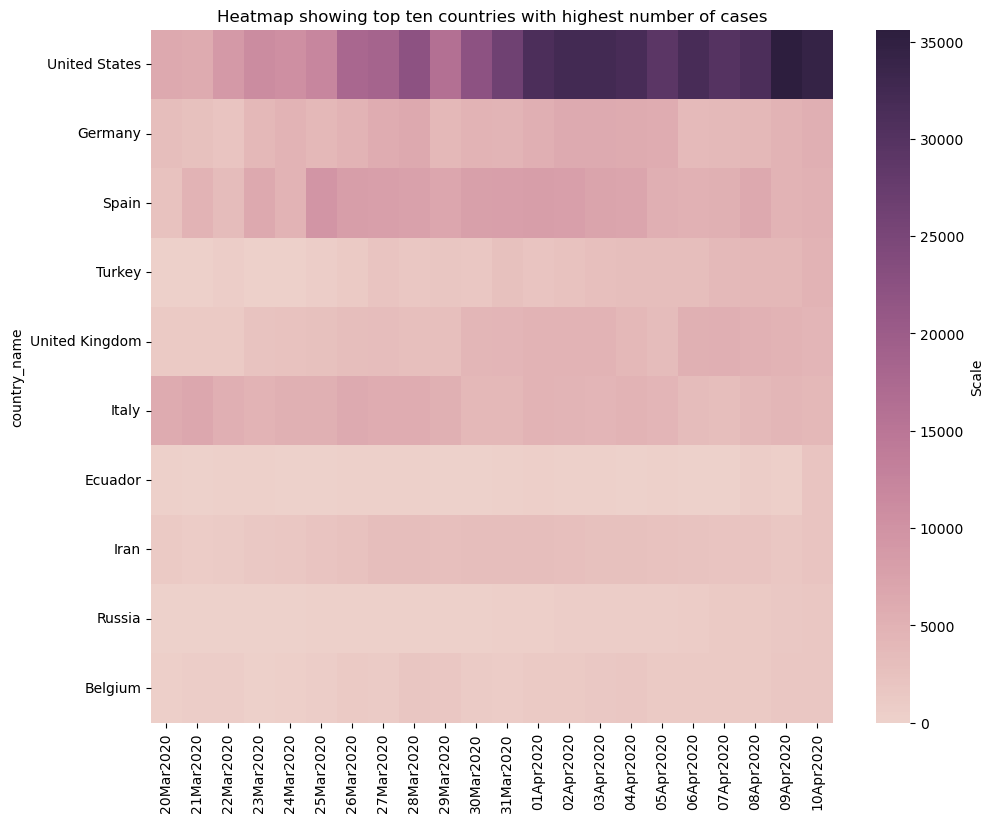

In [42]:
plt.figure(figsize=(11,9))
sns.heatmap(top_ten_countries, annot=False, cmap=sns.cubehelix_palette(as_cmap=True), cbar_kws={'label': 'Scale'})
plt.title('Heatmap showing top ten countries with highest number of cases')
plt.show()

Q5

In [43]:
df_confirmed_deaths_copy = df_confirmed_deaths.copy()
df_confirmed_deaths_copy.set_index('country_name', inplace=True)

In [44]:
total_deaths = df_confirmed_deaths_copy.iloc[:, -1]
total_deaths

country_name
Aruba             3.0
Afghanistan     119.0
Angola            2.0
Albania          31.0
Andorra          48.0
                ...  
Vanuatu           0.0
Yemen             8.0
South Africa    194.0
Zambia            7.0
Zimbabwe          4.0
Name: 10May2020, Length: 187, dtype: float64

In [45]:
total_deaths = pd.DataFrame(total_deaths)

In [46]:
total_deaths.rename(columns={'10May2020': 'deaths'}, inplace=True)
total_deaths

deaths
country_name        
Aruba            3.0
Afghanistan    119.0
Angola           2.0
Albania         31.0
Andorra         48.0
...              ...
Vanuatu          0.0
Yemen            8.0
South Africa   194.0
Zambia           7.0
Zimbabwe         4.0

[187 rows x 1 columns]

In [47]:
united_states_deaths = total_deaths.loc['United States', 'deaths']
united_states_deaths

83059.0

In [48]:
rest_of_world_deaths = total_deaths.loc[total_deaths.index, 'deaths'].sum()
rest_of_world_deaths

294250.0

In [49]:
united_states_percent = (united_states_deaths/rest_of_world_deaths) * 100
united_states_percent

28.227357689039934

In [50]:
pie_chart_labels = ['United States', 'Rest of the world']
pie_chart_sizes = [united_states_percent, 100 - united_states_percent]

In [51]:
df_confirmed_cases_copy = df_confirmed_cases.copy()
df_confirmed_cases_copy.set_index('country_name', inplace=True)

In [52]:
total_cases = df_confirmed_cases_copy.iloc[:, -1]
total_cases

country_name
Aruba             101.0
Afghanistan      4402.0
Angola             45.0
Albania           868.0
Andorra           755.0
                 ...   
Vanuatu             0.0
Yemen              51.0
South Africa    10015.0
Zambia            267.0
Zimbabwe           36.0
Name: 10May2020, Length: 187, dtype: float64

In [53]:
total_cases = pd.DataFrame(total_cases)

In [54]:
total_cases.rename(columns={'10May2020': 'confirmed_cases'}, inplace=True)
total_cases

confirmed_cases
country_name                 
Aruba                   101.0
Afghanistan            4402.0
Angola                   45.0
Albania                 868.0
Andorra                 755.0
...                       ...
Vanuatu                   0.0
Yemen                    51.0
South Africa          10015.0
Zambia                  267.0
Zimbabwe                 36.0

[187 rows x 1 columns]

In [55]:
united_states_cases = total_cases.loc['United States', 'confirmed_cases']
united_states_cases

1332332.0

In [56]:
rest_of_world_cases = total_cases.loc[total_cases.index, 'confirmed_cases'].sum()
rest_of_world_cases

4095274.0

In [57]:
united_states_cases_percent = (united_states_cases/rest_of_world_cases) * 100
united_states_cases_percent

32.53340313737249

In [58]:
pie_chart_labels1 = ['United States', 'Rest of the world']
pie_chart_sizes1 = [united_states_cases_percent, 100 - united_states_cases_percent]

In [59]:
united_states_population = 328000000
world_population = 7800000000

In [60]:
united_states_population_percent = (united_states_population/world_population) * 100
united_states_population_percent

4.205128205128205

In [61]:
pie_chart_labels2 = ['United States', 'Rest of the world']
pie_chart_sizes2 = [united_states_population_percent, 100 - united_states_population_percent]

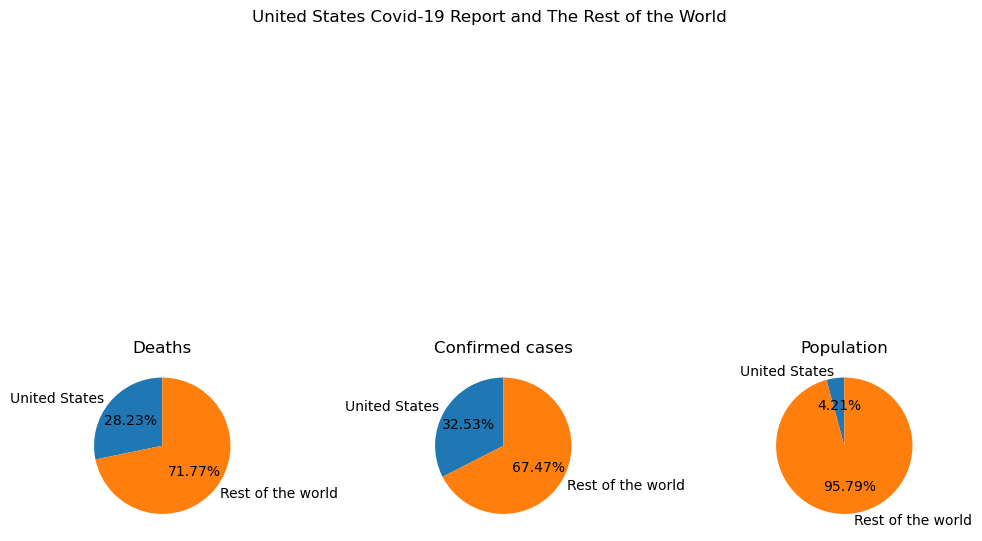

In [62]:
plt.figure(figsize=(11,9))

plt.subplot(1, 3, 1)
plt.pie(pie_chart_sizes, labels=pie_chart_labels, autopct='%1.2f%%', startangle=90)
plt.title('Deaths')

plt.subplot(1, 3, 2)
plt.pie(pie_chart_sizes1, labels=pie_chart_labels1, autopct='%1.2f%%', startangle=90)
plt.title('Confirmed cases')

plt.subplot(1, 3, 3) 
plt.pie(pie_chart_sizes2, labels=pie_chart_labels2, autopct='%1.2f%%', startangle=90)
plt.title('Population')

plt.suptitle("United States Covid-19 Report and The Rest of the World")
plt.subplots_adjust(wspace=1)
plt.show()

### Part 3

Q6

In [63]:
count = new_cases_confirmed_df[['country_name']]
dat = new_cases_confirmed_df.loc[:, '01Mar2020': '01May2020']

new_cases_mar_may = pd.concat([count, dat], axis=1)
new_cases_mar_may

country_name  01Mar2020  02Mar2020  03Mar2020  04Mar2020  05Mar2020  \
0           Aruba        0.0        0.0        0.0        0.0        0.0   
1     Afghanistan        0.0        0.0        0.0        0.0        0.0   
2          Angola        0.0        0.0        0.0        0.0        0.0   
3         Albania        0.0        0.0        0.0        0.0        0.0   
4         Andorra        0.0        1.0        0.0        0.0        0.0   
..            ...        ...        ...        ...        ...        ...   
182       Vanuatu        0.0        0.0        0.0        0.0        0.0   
183         Yemen        0.0        0.0        0.0        0.0        0.0   
184  South Africa        0.0        0.0        0.0        0.0        1.0   
185        Zambia        0.0        0.0        0.0        0.0        0.0   
186      Zimbabwe        0.0        0.0        0.0        0.0        0.0   

     06Mar2020  07Mar2020  08Mar2020  09Mar2020  ...  22Apr2020  23Apr2020  \
0          0.0        0.0        0.0        0.0  ...        3.0        0.0   
1          0.0        3.0        0.0        0.0  ...       66.0       84.0   
2          0.0        0.0        0.0        0.0  ...        1.0        0.0   
3          0.0        0.0        0.0        2.0  ...       25.0       29.0   
4          0.0        0.0        0.0        0.0  ...        6.0        0.0   
..         ...        ...        ...        ...  ...        ...        ...   
182        0.0        0.0        0.0        0.0  ...        0.0        0.0   
183        0.0        0.0        0.0        0.0  ...        0.0        0.0   
184        0.0        0.0        2.0        0.0  ...      170.0      318.0   
185        0.0        0.0        0.0        0.0  ...        4.0        2.0   
186        0.0        0.0        0.0        0.0  ...        0.0        0.0   

     24Apr2020  25Apr2020  26Apr2020  27Apr2020  28Apr2020  29Apr2020  \
0          0.0        0.0        0.0        0.0        0.0        0.0   
1         50.0      104.0      133.0       68.0      172.0      124.0   
2          0.0        0.0        1.0        1.0        0.0        0.0   
3         15.0       34.0       14.0       10.0       14.0       16.0   
4          8.0        7.0        0.0        5.0        0.0        0.0   
..         ...        ...        ...        ...        ...        ...   
182        0.0        0.0        0.0        0.0        0.0        0.0   
183        0.0        0.0        0.0        0.0        0.0        5.0   
184      267.0      141.0      185.0      247.0      203.0      354.0   
185        8.0        0.0        4.0        0.0        7.0        2.0   
186        1.0        2.0        0.0        1.0        0.0        0.0   

     30Apr2020  01May2020  
0          0.0        0.0  
1          0.0      344.0  
2          0.0        3.0  
3          7.0        9.0  
4          2.0        0.0  
..         ...        ...  
182        0.0        0.0  
183        0.0        1.0  
184      297.0      304.0  
185        9.0        3.0  
186        8.0        0.0  

[187 rows x 63 columns]

In [64]:
five_countries = new_cases_mar_may[new_cases_mar_may['country_name'].isin(['United Kingdom', 'Spain', 'Italy', 'France', 'United States'])]
five_countries

country_name  01Mar2020  02Mar2020  03Mar2020  04Mar2020  05Mar2020  \
53            Spain       39.0       36.0       45.0       57.0       37.0   
58           France       30.0       61.0       21.0       73.0      138.0   
61   United Kingdom       33.0       40.0       55.0       56.0       49.0   
84            Italy      566.0      342.0      466.0      587.0      769.0   
177   United States        7.0       23.0       19.0       33.0       77.0   

     06Mar2020  07Mar2020  08Mar2020  09Mar2020  ...  22Apr2020  23Apr2020  \
53       141.0      100.0      173.0      400.0  ...     4211.0     4635.0   
58       190.0      325.0      177.0      286.0  ...     1782.0    -1722.0   
61        79.0       55.0       54.0      147.0  ...     5490.0     5143.0   
84       778.0     1247.0     1492.0     1797.0  ...     3370.0     2646.0   
177       53.0      166.0      116.0       75.0  ...    29881.0    31965.0   

     24Apr2020  25Apr2020  26Apr2020  27Apr2020  28Apr2020  29Apr2020  \
53    -10034.0     2915.0     1729.0     1831.0     1308.0     2144.0   
58      2772.0     1642.0      612.0     3685.0     3058.0    -1457.0   
61      4973.0     3748.0     3468.0     4702.0     4721.0     5435.0   
84      3021.0     2357.0     2324.0     1739.0     2091.0     2086.0   
177    31965.0    30914.0    25971.0    24649.0    24573.0    26852.0   

     30Apr2020  01May2020  
53       518.0     1781.0  
58      1133.0      520.0  
61      4956.0     4727.0  
84      1872.0     1965.0  
177    29702.0    34892.0  

[5 rows x 63 columns]

In [65]:
five_countries_copy = five_countries.copy()

In [66]:
five_countries_copy = five_countries_copy.set_index("country_name")

In [67]:
five_countries_copy

01Mar2020  02Mar2020  03Mar2020  04Mar2020  05Mar2020  \
country_name                                                            
Spain                39.0       36.0       45.0       57.0       37.0   
France               30.0       61.0       21.0       73.0      138.0   
United Kingdom       33.0       40.0       55.0       56.0       49.0   
Italy               566.0      342.0      466.0      587.0      769.0   
United States         7.0       23.0       19.0       33.0       77.0   

                06Mar2020  07Mar2020  08Mar2020  09Mar2020  10Mar2020  ...  \
country_name                                                           ...   
Spain               141.0      100.0      173.0      400.0      622.0  ...   
France              190.0      325.0      177.0      286.0      372.0  ...   
United Kingdom       79.0       55.0       54.0      147.0      258.0  ...   
Italy               778.0     1247.0     1492.0     1797.0      977.0  ...   
United States        53.0      166.0      116.0       75.0      188.0  ...   

                22Apr2020  23Apr2020  24Apr2020  25Apr2020  26Apr2020  \
country_name                                                            
Spain              4211.0     4635.0   -10034.0     2915.0     1729.0   
France             1782.0    -1722.0     2772.0     1642.0      612.0   
United Kingdom     5490.0     5143.0     4973.0     3748.0     3468.0   
Italy              3370.0     2646.0     3021.0     2357.0     2324.0   
United States     29881.0    31965.0    31965.0    30914.0    25971.0   

                27Apr2020  28Apr2020  29Apr2020  30Apr2020  01May2020  
country_name                                                           
Spain              1831.0     1308.0     2144.0      518.0     1781.0  
France             3685.0     3058.0    -1457.0     1133.0      520.0  
United Kingdom     4702.0     4721.0     5435.0     4956.0     4727.0  
Italy              1739.0     2091.0     2086.0     1872.0     1965.0  
United States     24649.0    24573.0    26852.0    29702.0    34892.0  

[5 rows x 62 columns]

In [68]:
five_countries_copy = five_countries_copy.T
five_countries_copy

country_name   Spain  France  United Kingdom   Italy  United States
01Mar2020       39.0    30.0            33.0   566.0            7.0
02Mar2020       36.0    61.0            40.0   342.0           23.0
03Mar2020       45.0    21.0            55.0   466.0           19.0
04Mar2020       57.0    73.0            56.0   587.0           33.0
05Mar2020       37.0   138.0            49.0   769.0           77.0
...              ...     ...             ...     ...            ...
27Apr2020     1831.0  3685.0          4702.0  1739.0        24649.0
28Apr2020     1308.0  3058.0          4721.0  2091.0        24573.0
29Apr2020     2144.0 -1457.0          5435.0  2086.0        26852.0
30Apr2020      518.0  1133.0          4956.0  1872.0        29702.0
01May2020     1781.0   520.0          4727.0  1965.0        34892.0

[62 rows x 5 columns]

In [69]:
# Reset the index
five_countries_copy = five_countries_copy.reset_index()

# Reshape the dataframe using melt
five_countries_melted = pd.melt(five_countries_copy, id_vars=['index'], var_name='country_name', value_name='cases')

In [70]:
five_countries_melted

index   country_name    cases
0    01Mar2020          Spain     39.0
1    02Mar2020          Spain     36.0
2    03Mar2020          Spain     45.0
3    04Mar2020          Spain     57.0
4    05Mar2020          Spain     37.0
..         ...            ...      ...
305  27Apr2020  United States  24649.0
306  28Apr2020  United States  24573.0
307  29Apr2020  United States  26852.0
308  30Apr2020  United States  29702.0
309  01May2020  United States  34892.0

[310 rows x 3 columns]

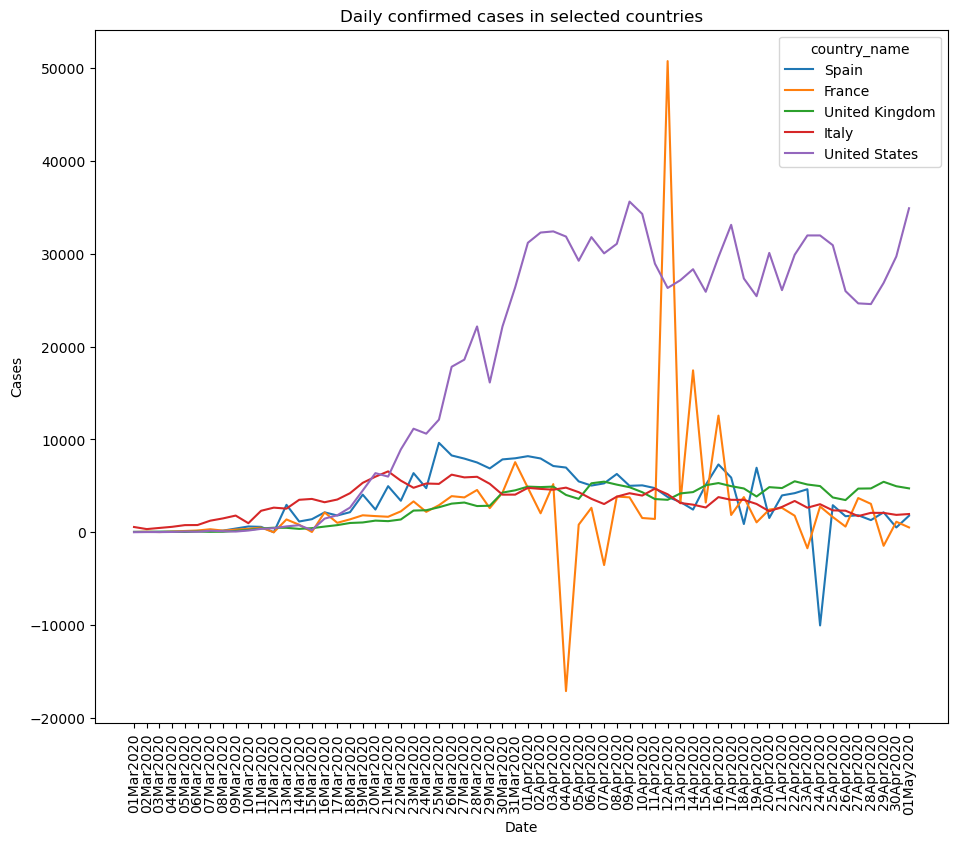

In [71]:
plt.figure(figsize=(11,9))
sns.lineplot(data=five_countries_melted, x='index', y='cases', hue='country_name')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.xticks(rotation = 90)
plt.title('Daily confirmed cases in selected countries')
plt.show()

The lineplot was used because it is the best plot that displays time series data best.

The united states expereinced a steady rise in the number of confirmed cases which was maintained, while france experienced a massive fall in number of cases while also experiencing a massive increase in number of cases of a very short period of time, the United kingdom and italy experinced just a little increase in the number of confirmed cases and this little increase was through out, spain also experienced a little increase in the number of cases but in also experinced a massive decrease in number of cases which was then corrected

Q7

In [72]:
confirmed_cases_may = df_confirmed_cases[['country_name', '04May2020']]
confirmed_cases_may

country_name  04May2020
0           Aruba      100.0
1     Afghanistan     2469.0
2          Angola       35.0
3         Albania      803.0
4         Andorra      750.0
..            ...        ...
182       Vanuatu        0.0
183         Yemen       12.0
184  South Africa     7220.0
185        Zambia      137.0
186      Zimbabwe       34.0

[187 rows x 2 columns]

In [73]:
confirmed_cases_may = confirmed_cases_may[confirmed_cases_may['04May2020'] > 1000]
confirmed_cases_may

country_name  04May2020
1             Afghanistan     2469.0
5    United Arab Emirates    14730.0
6               Argentina     4887.0
7               Australia     6847.0
8                 Austria    15621.0
..                    ...        ...
171                Turkey   127659.0
175               Ukraine    12331.0
177         United States  1185709.0
178            Uzbekistan     2189.0
184          South Africa     7220.0

[88 rows x 2 columns]

In [74]:
stringency_index_may = df_stringency_index[['country_name', '04May2020']]
stringency_index_may

country_name  04May2020
0           Aruba      81.48
1     Afghanistan      84.26
2          Angola      78.70
3         Albania      89.81
4         Andorra      52.78
..            ...        ...
182       Vanuatu      77.78
183         Yemen      64.81
184  South Africa      84.26
185        Zambia      70.83
186      Zimbabwe      87.96

[187 rows x 2 columns]

In [75]:
confirmed_deaths_may = df_confirmed_deaths[['country_name', '04May2020']]
confirmed_deaths_may

country_name  04May2020
0           Aruba        2.0
1     Afghanistan       72.0
2          Angola        2.0
3         Albania       31.0
4         Andorra       45.0
..            ...        ...
182       Vanuatu        0.0
183         Yemen        2.0
184  South Africa      138.0
185        Zambia        3.0
186      Zimbabwe        4.0

[187 rows x 2 columns]

In [76]:
confirmed_stringency = pd.merge(confirmed_cases_may, stringency_index_may, on='country_name', how='left')
confirmed_stringency = pd.merge(confirmed_stringency, confirmed_deaths_may, on='country_name', how='left')
confirmed_stringency

country_name  04May2020_x  04May2020_y  04May2020
0            Afghanistan       2469.0        84.26       72.0
1   United Arab Emirates      14730.0        77.78      137.0
2              Argentina       4887.0        88.89      260.0
3              Australia       6847.0        69.44       96.0
4                Austria      15621.0        64.81      600.0
..                   ...          ...          ...        ...
83                Turkey     127659.0        75.93     3461.0
84               Ukraine      12331.0        88.89      303.0
85         United States    1185709.0        72.69    72365.0
86            Uzbekistan       2189.0        93.52       10.0
87          South Africa       7220.0        84.26      138.0

[88 rows x 4 columns]

In [77]:
new_names = {
    '04May2020_x': 'cases',
    '04May2020_y': 'stringency_index',
    '04May2020' : 'deaths'
}

In [78]:
confirmed_stringency.rename(columns=new_names, inplace=True)
confirmed_stringency

country_name      cases  stringency_index   deaths
0            Afghanistan     2469.0             84.26     72.0
1   United Arab Emirates    14730.0             77.78    137.0
2              Argentina     4887.0             88.89    260.0
3              Australia     6847.0             69.44     96.0
4                Austria    15621.0             64.81    600.0
..                   ...        ...               ...      ...
83                Turkey   127659.0             75.93   3461.0
84               Ukraine    12331.0             88.89    303.0
85         United States  1185709.0             72.69  72365.0
86            Uzbekistan     2189.0             93.52     10.0
87          South Africa     7220.0             84.26    138.0

[88 rows x 4 columns]

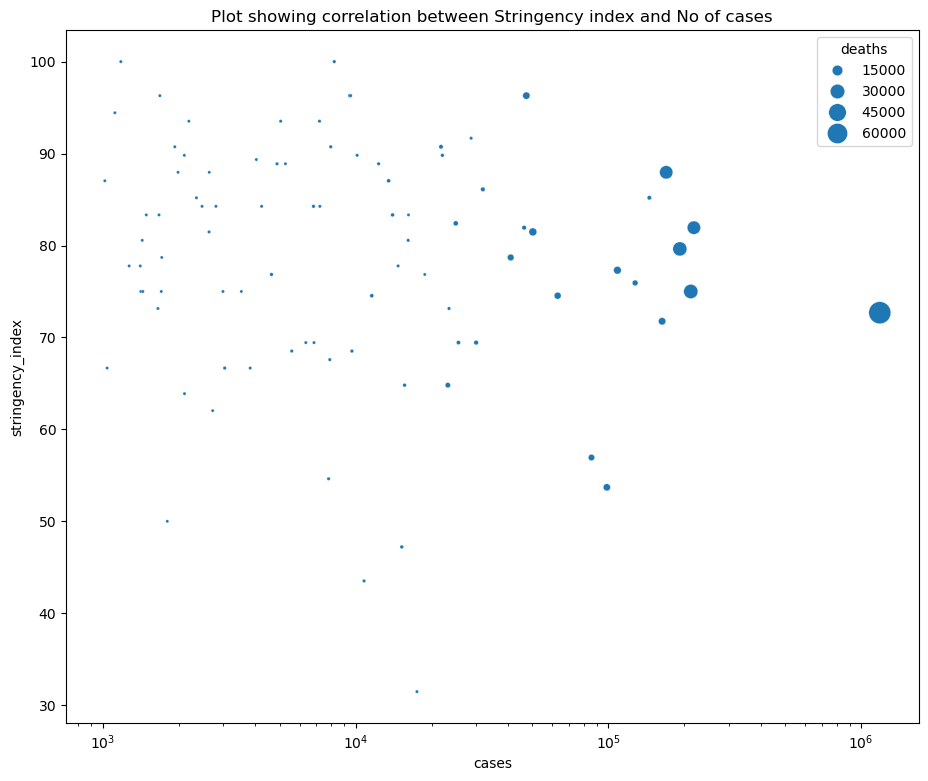

In [79]:
plt.figure(figsize=(11,9))
sns.scatterplot(data=confirmed_stringency, x='cases', y='stringency_index', size='deaths', sizes=(5, 250))
plt.title('Plot showing correlation between Stringency index and No of cases')
plt.xscale('log')
plt.show()